# 1. 多分类交叉熵损失函数

# 1.1 由二分类推广到多分类

二分类交叉熵损失可以被推广到多分类上，但在实际处理时，二分类与多分类却有一些关键的区别。依然使用极大似然估计的推到流程，首先我们来确定“单一样本被预测正确”这一时间的概率最大化后的似然函数。

对于多分类的状况而言，标签不再服从伯努利分布（0-1），因此我们可以定义，样本 i 在由特征向量 xi 和权重向量 W 组成的预测函数中，样本标签被预测为类别 K 的概率为：

$$
P_k=P\left(\hat{y}_i=k \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=\sigma
$$

对于多分类算法而言，$ \sigma $ 就是softmax函数返回的对应类别的值

假设一种最简单的情况：我们现在有三分类[1, 2, 3], 则样本 i 被预测为三个类别的概率分别为：

$$
\begin{aligned}
& P_1=P\left(\hat{y}_i=1 \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=\sigma_1 \\
& P_2=P\left(\hat{y}_i=2 \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=\sigma_2 \\
& P_3=P\left(\hat{y}_i=3 \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=\sigma_3
\end{aligned}
$$

假设样本的真实标签为1，我们就希望 P1最大，同理，如果样本的真实标签为其他值，我们就希望其他值所对应的概率最大。在二分类中，我们将 y 和 （1- y）作为概率P的指数，以此来融合真实标签为0和1的两种状况。但在多分类中，我们的真实标签可能是任意整数，无法使用y和（1-y）这样的结构来构建似然函数。所以我们认为，如果多分类的标签也可以使用0和1来表示就好了，这样我们就可以继续使用真实标签作为指数的方式：

因此，我们对多分类的标签做出了如下变化：

![Alt text](image-11.png)

原本的真实标签 y 是含有 [1, 2, 3]三个分类的列向量，现在我们把它变成了标签矩阵，每个样本对应一个向量。（如果你熟悉机器学习或者统计学，你能够一眼看出这其实就是独热编码 one hot）。在矩阵中，每一行依旧对应样本，但却由三分类衍生出了三个新的列，分别代表：真实标签是否等于1， 等于2以及等于3。在矩阵中，我们使用“1”标注出样本的真实标签位置，使用0表示样本的真实标签不是这个标签。不难注意到，这个标签矩阵的结构其实是和 softmax 函数输出的概率矩阵的结构一致，并且一一对应的。

当我们把标签整合为标签矩阵后，我们就可以将单个样本在总共K个分类情况整合为以下的似然函数：

$$
P\left(\hat{y}_i \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=P_1^{y_i(k=1)} * P_2^{y_{1(k=2)}} * P_3^{y_1(h=3)} * \ldots * P_K^{y_i(k=K)}
$$

注意：
许多教材和公式中，都会把多分类似然函数概率的指数直接写作yi，而你若能理解此处的指数其实就是0和1，（0-不是真实标签， 1-是真实标签），而不是真正的标签yi，那你直接把指数写作 yi 也是没问题的。为避免混淆，在我们的课程中，还是写作 yi(k= 具体标签值)

虽然是连乘，但对于一个样本，除了自己所在的真实类别指数 yi 会是1之外，其它类别的指数都是0，所以被分类为其它类别的概率在这个式子里就都为0，所以我们可以将式子简写为：
 
 $$
P\left(\hat{y}_i \mid \boldsymbol{x}_i, \boldsymbol{w}\right)=P_j^{y_i(k=j)}, j \text { 为样本 } i \text { 所对应的真实标签的编号 }
$$

对一个训练集的m个样本来说，我们可以定义如下等式来表达所有样本在特征张量 X 和权重 W 组成的预测函数中，预测出所有可能的概率 P 为：

$$
\begin{aligned}
\boldsymbol{P} & =\prod_{i=1}^m P\left(\hat{y}_i \mid x_i, w\right) \\
& =\prod_{i=1}^m P_j^{y_{i(k=j)}} \\
& =\prod_{i=1}^m \sigma_j^{y_{i(k=j)}}
\end{aligned}
$$

这就是多分类状况下的似然函数。与二分类一致，似然函数解出来后，我们需要对似然函数求对数：

$$
\begin{aligned}
\ln \boldsymbol{P} & =\ln \prod_{i=1}^m \sigma_j^{y_{i(k=j)}} \\
& =\sum_{i=1}^m \ln \left(\sigma_j^{y_{i(k=j)}}\right) \\
& =\sum_{i=1}^m y_{i(k=j)} \ln \sigma_i
\end{aligned}
$$

其中 $ \sigma $ 就是softmax函数返回的对应的类别的值。再对整个公式取负数，就得到了多分类状况下的损失函数

$$
L(w)=-\sum_{i=1}^m y_{i(k=j)} \ln \sigma_i
$$

这个函数就是我们之前提到过的交叉熵函数。不难看出，二分类交叉熵函数其实就是多分类的一种特殊情况

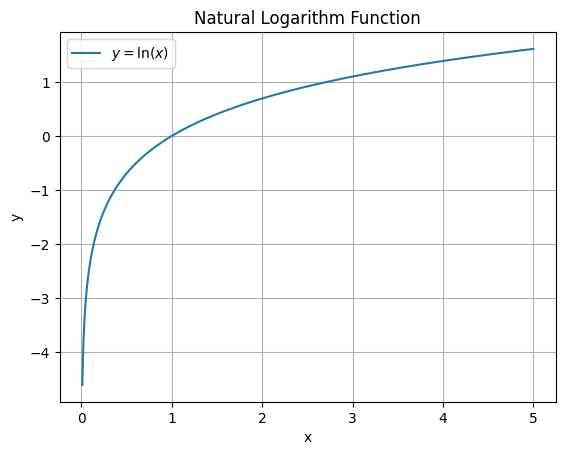

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 生成 x 值的范围
x = np.linspace(0.01, 5, 400)  # 从0.01到5之间生成400个点，避免对数函数的定义域问题

# 计算自然对数函数的 y 值
y = np.log(x)

# 绘制图像
plt.plot(x, y, label=r'$y = \ln(x)$')  # 使用LaTeX格式的标签
plt.xlabel('x')
plt.ylabel('y')
plt.title('Natural Logarithm Function')
plt.legend()
plt.grid(True)
plt.show()


![Alt text](image-12.png)

交叉熵函数十分特殊，虽然我们求解过程中，取对数的操作是在确定了似然函数后才进行的，但从计算结果来看，对数操作其实只对 softmax 函数的结果 $ \sigma $ 起效。因此在实际操作中，我们把 ln（softmax(z)）这样的函数单独定义了一个功能叫做 logsoftmax，PyTorch中可以直接通过 nn.logsoftmax类调用这个功能。同时，我们把对数之外的，乘以标签、加和、取负等等过程打包起来，称为负对数似然函数（Negative Log Likehood function）,在PyTorch中可以使用 nn.NLLLoss来进行调用。也就是说，在计算损失函数时，我们不再需要使用单独的 softmax 函数了。

## 1.2 用PyTorch实现多分类交叉熵损失

在PyTorch中实现交叉熵函数的时候，有两种方法：

* 调用 logsoftmax和NLLLoss实现

In [7]:
import torch
import torch.nn as nn 

m = 3*pow(10, 3)
torch.random.manual_seed(420)

X = torch.rand((m, 4), dtype= torch.float32)
W = torch.rand((4, 3), dtype= torch.float32)
y = torch.randint(low= 0, high= 3, size=(m,), dtype= torch.float32)

zhat = torch.mm(X, W)

In [8]:
logsm = nn.LogSoftmax(dim= 1)
logsigma = logsm(zhat)
logsigma

tensor([[-1.1139, -0.8802, -1.3585],
        [-1.0558, -0.8982, -1.4075],
        [-1.0920, -1.0626, -1.1430],
        ...,
        [-1.0519, -0.9180, -1.3805],
        [-1.0945, -1.1219, -1.0798],
        [-1.0276, -0.8891, -1.4649]])

In [11]:
criterion = nn.NLLLoss()
criterion(logsigma, y.long())


tensor(1.1147)

* 直接调用 CrossEntrophyLoss

In [12]:
criterion_2 = nn.CrossEntropyLoss()
criterion_2(zhat, y.long())

tensor(1.1147)

可以发现，两种输出方法得到的损失函数结果是一致的。与其他损失函数一致， CrossEntropyLoss 也有参数 reduction，可以设置为 mean, sum 以及None。

无论是二分类还是多分类，PyTorch都提供了包含输出层激活函数和不包含输出层激活函数的类的两种选择。在实际神经网络建模中，类可以被放入定义好的 Model 类中去构建神经网络的结构，因此是否包含激活函数，就由用户自行选择。

* 重视展示网络结构和灵活性，应该使用不包含输出层激活函数的类

通常在 Model类中，__init__中层的数量与 forward函数中对应的激活函数的数量是一致的，如果我们使用内置 sigmoid、logsoftmax 功能的类来计算损失函数，forward函数在定义时就会少一层（输出层），网络结构展示就不够简单明了，对于结构复杂的网络而言，结构清晰更为重要。同时，如果激活函数是单独写的，要修改激活函数就变得很容易，如果混在损失函数中，要修改激活函数就得改掉整个损失函数的代码，不利于维护。

* 重视稳定性和运算精度，使用包含输出层激活函数的类

如果在一个 Model 中，很长时间我们都不会修改输出层的激活函数，并且模型的稳定运行更为要紧，我们就使用内置了激活函数的类来计算损失函数。同时，就像之前提到的，内置激活函数可以帮助我们提升运算的精度。